In [1]:
import sys
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import copy
sys.path.insert(0, '/home/ryan/projects/CHARM-KASTr/py/')
from extraction import *
from extraction_scripts import *

In [2]:
import glob

import astropy.io.fits as fits

biaspath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/bias/"

flatpath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/flat/"

sciencepath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/science/"

tellpath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/telluric/"

arcpath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/arc/"

darkpath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/dark/"

BIAS = []

FLAT = []

SCIENCE = []

TELLURIC = []

ARC = []

for filename in glob.glob(biaspath + '*.fits'):
    BIAS.append(fits.open(filename))

for filename in glob.glob(flatpath + '*.fits'):
    FLAT.append(fits.open(filename))

for filename in glob.glob(sciencepath + '*.fits'):
    SCIENCE.append(fits.open(filename))
    
for filename in glob.glob(tellpath + '*.fits'):
    TELLURIC.append(fits.open(filename))

for filename in glob.glob(arcpath + '*.fits'):
    ARC.append(fits.open(filename))

In [3]:
median_biasframe = cube_median(BIAS)

median_flatframe = cube_median(FLAT)

bias_subtracted_flat = bias_subtract(median_flatframe, median_biasframe)

image_mask = create_mask(bias_subtracted_flat, median_biasframe)

norm_flat = normalize_flat(bias_subtracted_flat, image_mask)

In [8]:
tpath0 = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/telluric/r1080.fits'

tfile0 = fits.open(tpath0)

tslcs0, tvarslcs0, tpolymod0, tpolyfit0, tprof0 = reduce_standard_first_stage(tfile0, median_biasframe, norm_flat, image_mask, 20)

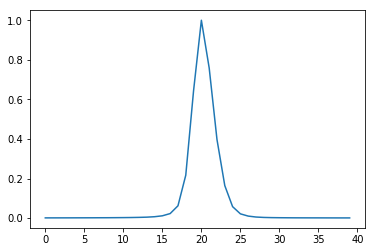

In [10]:
plt.plot(tprof0)
plt.show()

In [11]:
tspec0, tvar0, tback0 = reduce_second_stage(tslcs0, tvarslcs0, tprof0, 0.1)

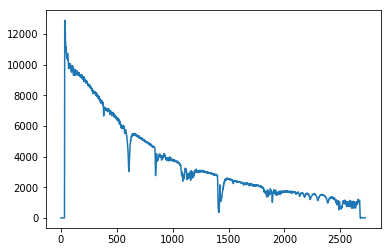

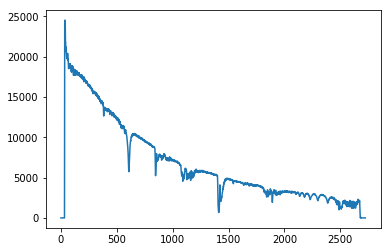

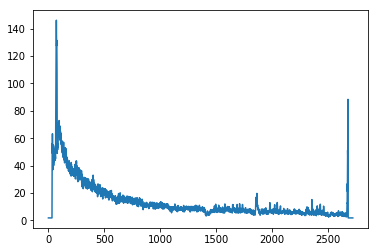

In [12]:
plt.plot(tspec0)
plt.show()

plt.plot(tvar0)
plt.show()

plt.plot(tback0)
plt.show()

In [13]:
wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')

wavecal = np.poly1d(wavemod)

Text(0.5, 1.0, 'HD 86593')

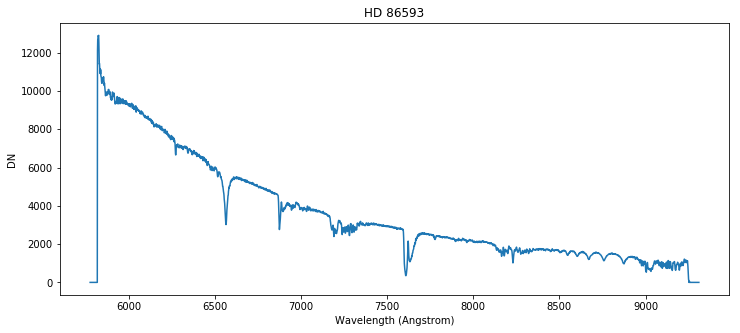

In [16]:
pxrange = range(len(tspec0))

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), tspec0)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('DN')
plt.title('HD 86593')

In [33]:
import pandas as pd

PX = pxrange

WAVELENGTH = wavecal(pxrange)

FLUX = tspec0

STDEV = np.sqrt(tvar0)

BKG = tback0

PX = np.reshape(PX)

'''
head = ['PX', 'WAVELENGTH', 'FLUX', 'STDEV', 'BKG']

tdata = [PX, WAVELENGTH, FLUX, STDEV, BKG]

tdf = pd.DataFrame(data=tdata, columns=head)

tdf.to_csv("HD86593.csv", index=False)
'''

[   0    1    2 ... 2722 2723 2724]


'\nhead = [\'PX\', \'WAVELENGTH\', \'FLUX\', \'STDEV\', \'BKG\']\n\ntdata = [PX, WAVELENGTH, FLUX, STDEV, BKG]\n\ntdf = pd.DataFrame(data=tdata, columns=head)\n\ntdf.to_csv("HD86593.csv", index=False)\n'